In [127]:
import TurbPy as tb
from TurbPy.imports import *

In [128]:
# deck = 'KH_Lv1di/'
# deck = 'turb2/'
# deck = 'turb_vth0.01/'
# deck = 'KH_test/'
# deck = 'KH_beta0.1/'
# deck = 'KH_subash/'
# deck = 'KH_new/'
deck = 'KH_800ppc/'


dirs = '/pscratch/sd/g/goodwill/' + deck

figs = '/pscratch/sd/g/goodwill/Fig/' + deck

info = tb.get_vpic_info(dirs)
times = tb.get_times(dirs)
en_out = tb.read_energies(dirs)/(info['Lx/de'] * info['Ly/de'] * info['Lz/de'])

twci_out = np.linspace(0, times[-1] * info['dt*wci'], len(en_out['EM']))
twci = np.linspace(0, times[-1] * info['dt*wci'], len(times))

twce_out = np.linspace(0, times[-1] * info['dt*wce'], len(en_out['EM']))
twce = np.linspace(0, times[-1] * info['dt*wce'], len(times))

lx = np.linspace(0, info['Lx/di'], int(info['nx']))
ly = np.linspace(0, info['Ly/di'], int(info['ny']))

In [129]:
ds = tb.get_xarray(dirs)

In [130]:
print(ds)

<xarray.Dataset>
Dimensions:   (timestep: 81, x: 512, y: 1024)
Coordinates:
  * x         (x) int64 0 1 2 3 4 5 6 7 8 ... 504 505 506 507 508 509 510 511
  * y         (y) int64 0 1 2 3 4 5 6 7 ... 1017 1018 1019 1020 1021 1022 1023
  * timestep  (timestep) int64 0 3620 7240 10860 ... 278740 282360 285980 289600
Data variables: (12/20)
    bx        (timestep, x, y) float64 0.0 0.0 0.0 ... -0.001142 -0.002829
    by        (timestep, x, y) float64 0.02495 0.02495 ... 0.06363 0.06249
    bz        (timestep, x, y) float64 0.4994 0.4994 0.4994 ... 0.4851 0.4852
    ex        (timestep, x, y) float64 0.01246 0.01246 ... -0.0217 -0.01919
    ey        (timestep, x, y) float64 0.0 0.0 0.0 ... 0.0002253 0.001423
    ez        (timestep, x, y) float64 0.0 0.0 0.0 ... 0.009124 -0.001135
    ...        ...
    jye       (timestep, x, y) float64 0.02621 0.02383 ... -0.02239 -0.02159
    jze       (timestep, x, y) float64 -0.004435 -0.00195 ... 0.006675 0.009128
    rhoe      (timestep, x, y) flo

In [131]:
j = np.sqrt((ds['jxi'] + ds['jxe'])**2 + (ds['jyi'] + ds['jye'])**2 + (ds['jzi'] + ds['jze'])**2 )
B = np.sqrt((ds['bx']**2 + (ds['by'])**2))
we = tb.pcurl(ds['jxe']/ds['rhoe'], ds['jye']/ds['rhoe'], ds['jze']/ds['rhoe'], dx = info['Lx/de']/info['nx'], dy = info['Ly/de']/info['ny'])
we_abs = np.sqrt(we[0]**2 + we[1]**2 + we[2]**2)
pthe, pide = tb.ps_calc(dirs, times[20], species = 'electron')

In [132]:
print(twci[69])

172.48158252


In [133]:
print(times[20])

72400


In [134]:
print(we[1].shape)

(81, 512, 1024)


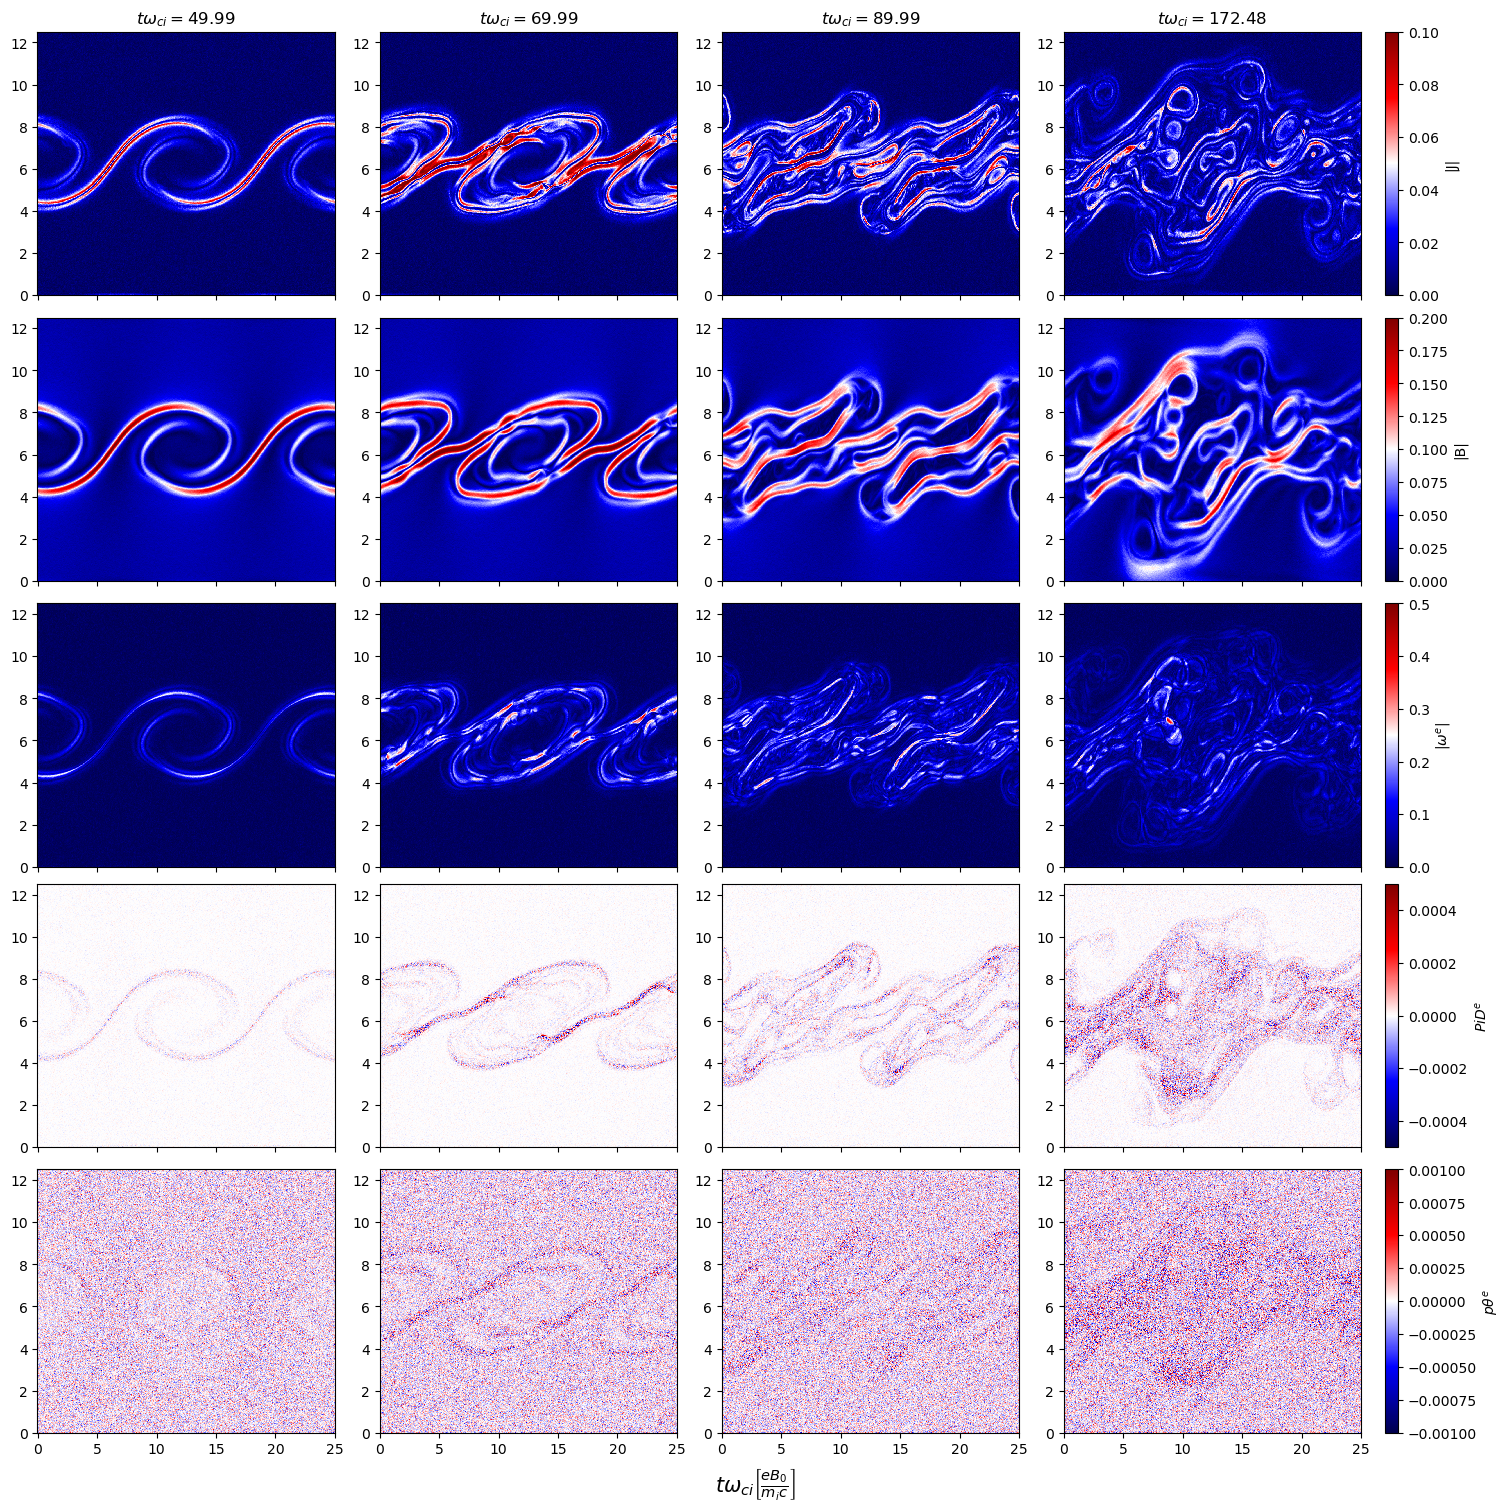

In [137]:
fig, axs = plt.subplots(5,4, figsize=(15, 15), sharex = True, layout='constrained')
snaps = [20, 28, 36, 69]
for i in np.arange(len(snaps)):
  t = snaps[i]
  map = 'seismic'
  pthe, pide = tb.ps_calc(dirs, times[t], species = 'electron')

  cm1 = axs[0,i].pcolormesh(ly,lx,j[t], cmap = map, vmin = 0, vmax = 0.1) 
  cm2 = axs[1,i].pcolormesh(ly,lx,B[t], cmap = map, vmin = 0, vmax = 0.2) 
  cm3 = axs[2,i].pcolormesh(ly,lx,we_abs[t], cmap = map,  vmin = 0, vmax = 0.5) 
  cm4 = axs[3,i].pcolormesh(ly,lx, pide, cmap = map,  vmin = -0.0005, vmax = 0.0005) 
  cm5 = axs[4,i].pcolormesh(ly,lx, pthe, cmap = map,  vmin = -0.001, vmax = 0.001)
  axs[0,i].set_title(r'$t\omega_{ci} = $'f'{np.round(twci[t],2)}')

  if i == len(snaps)-1:
    fig.colorbar(cm1 , ax = axs[0,i], label = '|J|')
    fig.colorbar(cm2 , ax=  axs[1,i], label = '|B|')
    fig.colorbar(cm3 , ax = axs[2,i], label = r'|$\omega^e$|')
    fig.colorbar(cm4 , ax = axs[3,i], label = r'$PiD^e$')
    fig.colorbar(cm5 , ax = axs[4,i], label = r'$p \theta^e$')


fig.supxlabel(r'$ t \omega_{ci} \left[ \frac{e B_0}{m_i c} \right]$', size = 15)
plt.savefig(figs + 'snaps.jpg', dpi = 400)